<a href="https://colab.research.google.com/github/conjurer2306/Data-analysis-on-goodreads-books-dataset/blob/master/DataExploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
#importing required packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn import preprocessing

In [27]:
#loading the csv file
df = pd.read_csv("books.csv",  error_bad_lines = False)
print("The data contains {0} Rows and {1} Columns".format(df.shape[0],df.shape[1]))

The data contains 13714 Rows and 10 Columns


b'Skipping line 4012: expected 10 fields, saw 11\nSkipping line 5688: expected 10 fields, saw 11\nSkipping line 7056: expected 10 fields, saw 11\nSkipping line 10601: expected 10 fields, saw 11\nSkipping line 10668: expected 10 fields, saw 11\n'


In [28]:
#Peek into first 5 rows and the column names of the dataframe
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,0439785960,9780439785969,eng,652,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,0439358078,9780439358071,eng,870,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,0439554934,9780439554930,eng,320,5629932,70390
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,0439554896,9780439554893,eng,352,6267,272
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9780439655484,eng,435,2149872,33964


In [29]:
# print column names 
print("Column names: {0}".format(list(df.columns)))

Column names: ['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13', 'language_code', '# num_pages', 'ratings_count', 'text_reviews_count']


In [30]:
#Check if the data has any null values
df.isnull().values.any()

False

In [31]:
#Get column information to explore variables and understand data better
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13714 entries, 0 to 13713
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              13714 non-null  int64  
 1   title               13714 non-null  object 
 2   authors             13714 non-null  object 
 3   average_rating      13714 non-null  float64
 4   isbn                13714 non-null  object 
 5   isbn13              13714 non-null  int64  
 6   language_code       13714 non-null  object 
 7   # num_pages         13714 non-null  int64  
 8   ratings_count       13714 non-null  int64  
 9   text_reviews_count  13714 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 1.0+ MB


In [32]:
continuousVars = ['bookID', 'average_rating', 'isbn13','# num_pages','ratings_count', 'text_reviews_count']
df[continuousVars].describe()

,bookID,average_rating,isbn13,# num_pages,ratings_count,text_reviews_count
count,13714.000000,13714.000000,1.371400e+04,13714.000000,1.371400e+04,13714.000000
mean,22159.859195,3.930620,9.764017e+12,342.402727,1.776540e+04,533.632128
std,13700.926816,0.357893,3.987679e+11,252.650165,1.129572e+05,2529.006691
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10619.250000,3.770000,9.780345e+12,196.000000,8.300000e+01,7.000000
50%,21321.500000,3.960000,9.780613e+12,301.000000,6.305000e+02,40.000000
75%,33311.750000,4.130000,9.780940e+12,421.000000,4.742250e+03,222.000000
max,47709.000000,5.000000,9.790008e+12,6576.000000,5.629932e+06,93619.000000


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


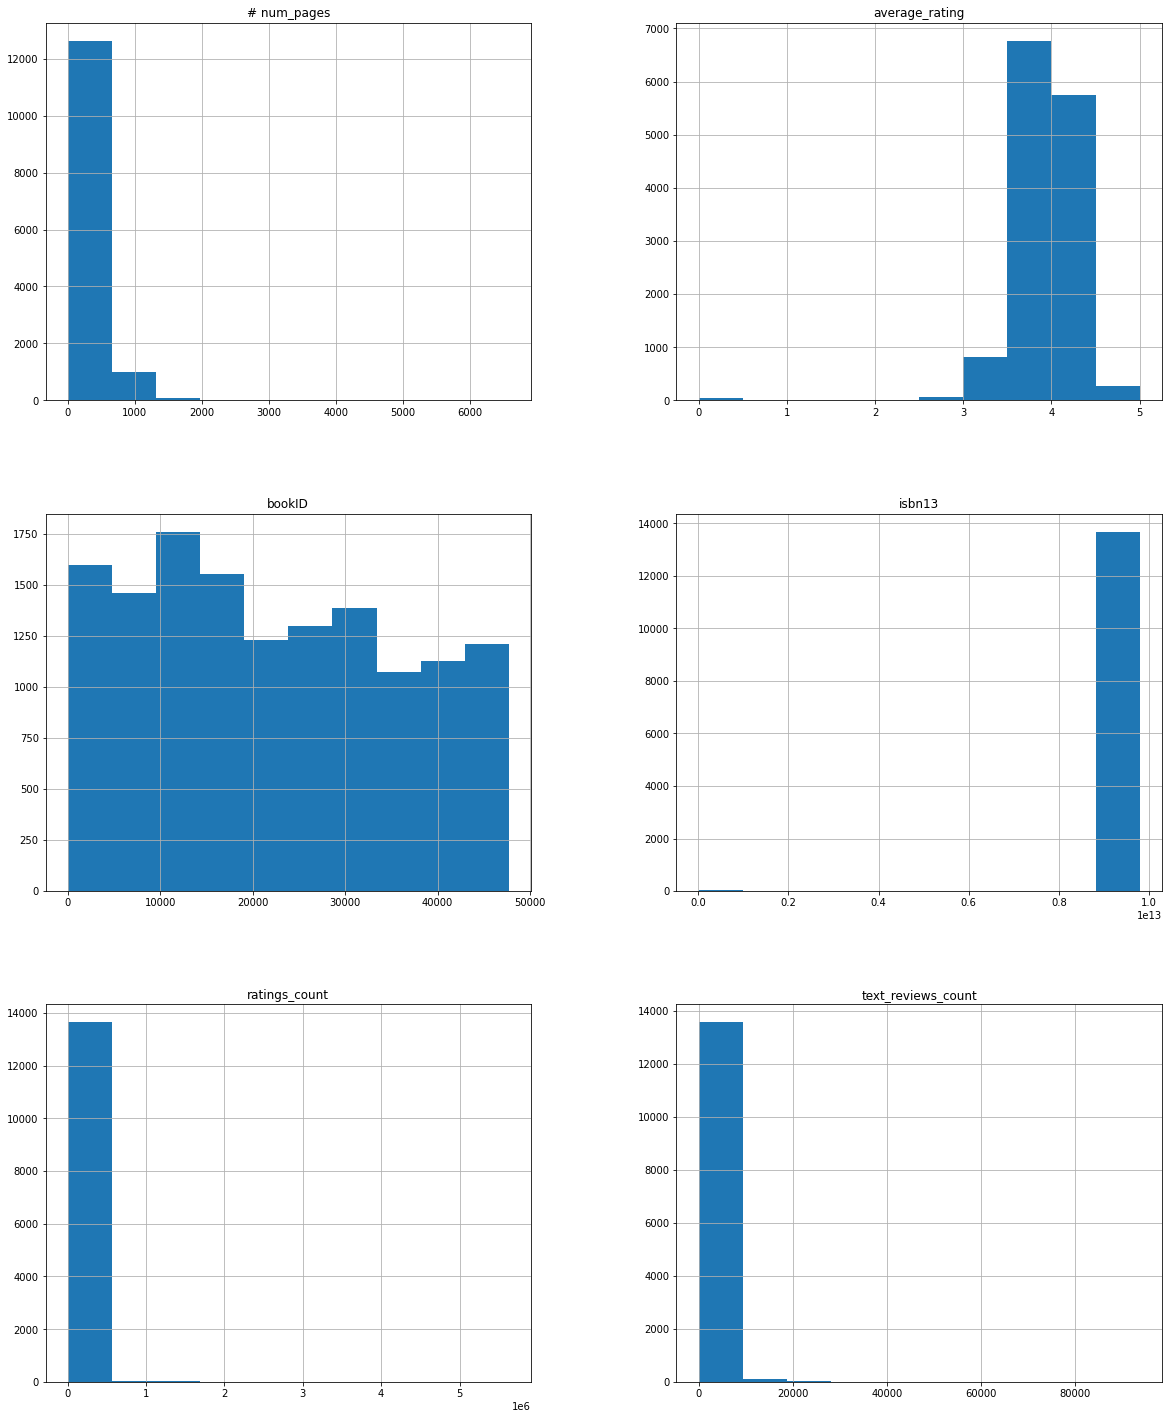

In [33]:
#building histograms depicting the counts
fig = plt.figure(figsize = (20,25))
ax = fig.gca()
df[continuousVars].hist(ax = ax)
plt.show()

In [34]:
# Drawing a Normal curve on the histograms to understand the distribution type
# The function PlotHistogramsWithNormalCurve fits a normal distribution to the data and has the following parameters:
# dfCol   - The univariate column for which to plot the histogram (pandas vector)
# varName - Column name to print on titles (string)
# bins    - Preferred bins in the histogram (default = 20)
# color   - Preferred color of histogram (default is blue)
def PlotHistogramsWithNormalCurve(dfCol, varName, bins=20, color='b'):
    dMean, dStd = norm.fit(dfCol)
    plt.figure(figsize = (8, 8))
    # Plot hist
    plt.hist(dfCol, bins, density=True, alpha=0.6, color=color)
    # Plot PDF.
    xmin, xmax = plt.xlim()
    xlin = np.linspace(xmin, xmax, 100)
    pdf = norm.pdf(xlin, dMean, dStd)
    plt.plot(xlin, pdf, 'k', linewidth=2)
    title = "Fit results for [" + varName + "]: Mean = %.4f,  Std. Dev, = %.4f" % (dMean, dStd)
    plt.title(title)
    plt.show()

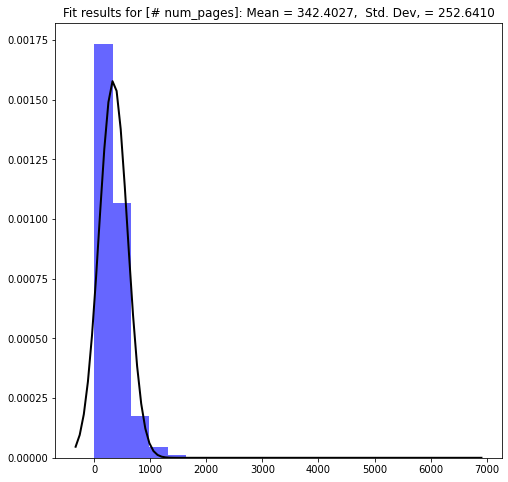

In [35]:
PlotHistogramsWithNormalCurve(df['# num_pages'], "# num_pages")

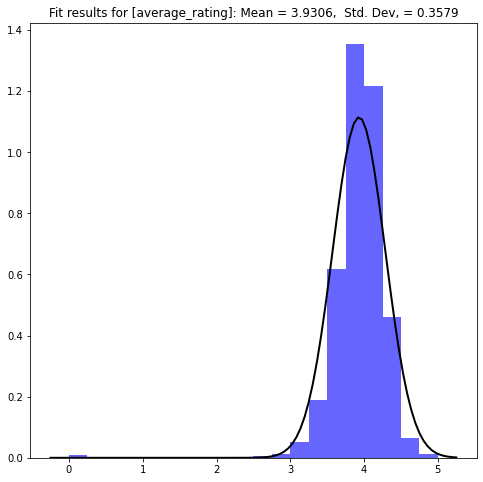

In [36]:
PlotHistogramsWithNormalCurve(df['average_rating'], "average_rating")

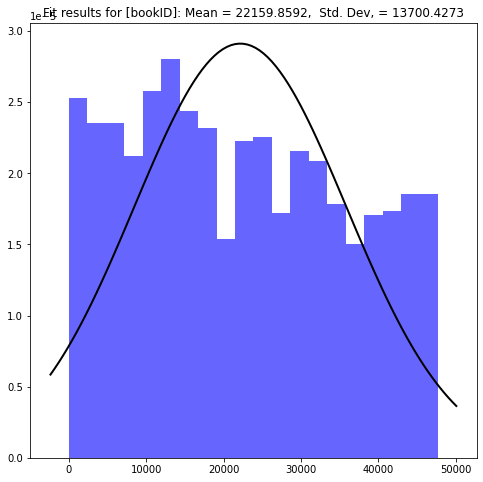

In [37]:
PlotHistogramsWithNormalCurve(df['bookID'], "bookID")

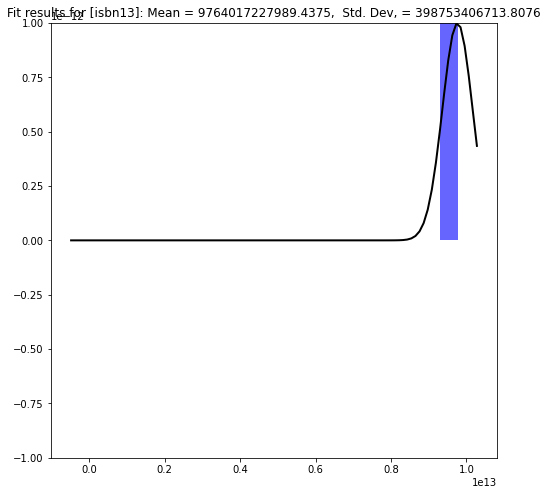

In [38]:
#isbn13' shows not much of a distribution, mostly falls into one bin
PlotHistogramsWithNormalCurve(df['isbn13'], "isbn13")

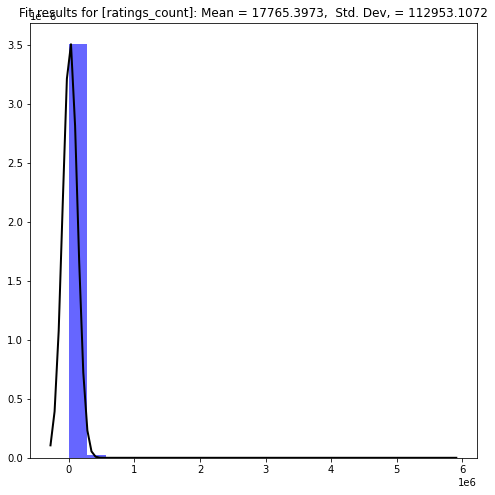

In [39]:
PlotHistogramsWithNormalCurve(df['ratings_count'], "ratings_count")

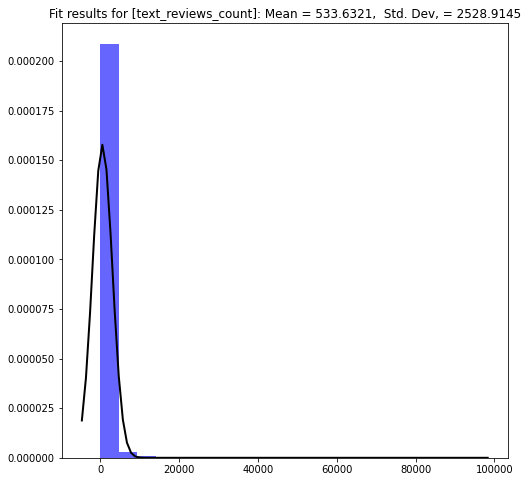

In [40]:
#Possibly left skewed but looks like there are some extreme values in the distribution
PlotHistogramsWithNormalCurve(df['text_reviews_count'], "text_reviews_count") 

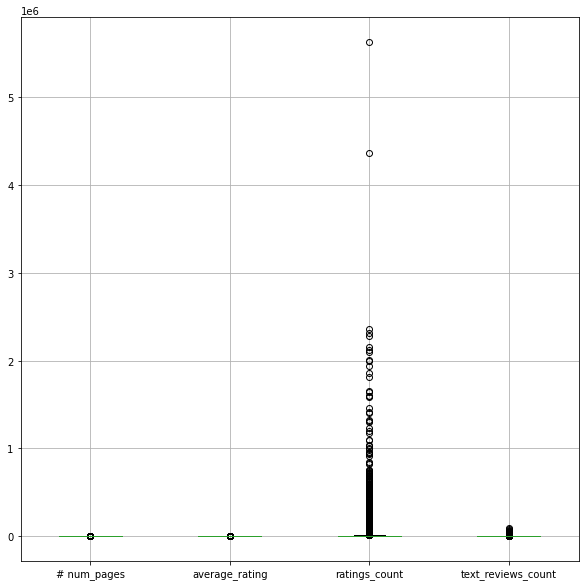

In [41]:
plt.figure(figsize = (10, 10))
df.boxplot(column= ['# num_pages', 'average_rating', 'ratings_count', 'text_reviews_count'])
plt.show()

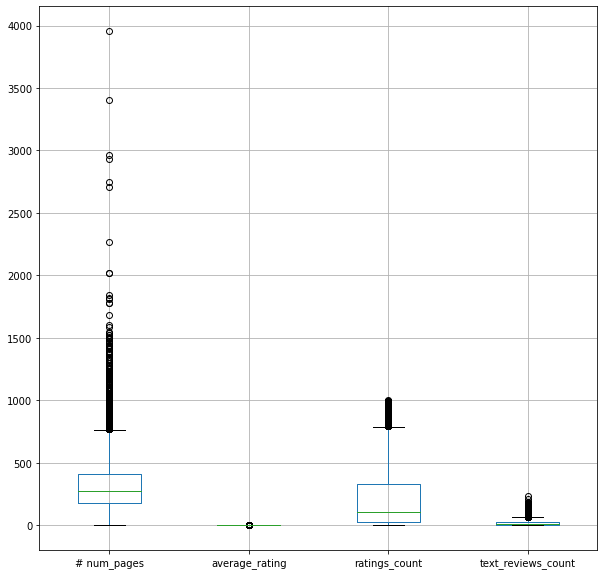

In [42]:
# normalising data
df2 = df[(df['ratings_count'] < 1000)]
plt.figure(figsize = (10, 10))
df2.boxplot(column= ['# num_pages', 'average_rating', 'ratings_count', 'text_reviews_count'])
plt.show()

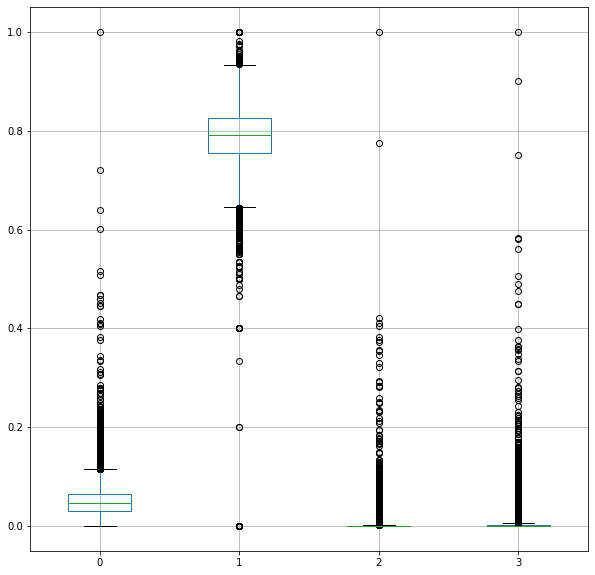

In [43]:
# Create varsToNormalize, where all the varsToNormalize values are treated as floats
varsToNormalize = df[['# num_pages', 'average_rating', 'ratings_count', 'text_reviews_count']].values.astype(float)

# Create a minimum and maximum preprocessing object
range_Scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
vars_Scaled = range_Scaler.fit_transform(varsToNormalize)

# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(vars_Scaled)

plt.figure(figsize = (10, 10))
df_normalized.boxplot()
plt.show()

In [44]:
# working on categorical variables in data
categoricalVars = ['title', 'authors', 'isbn', 'language_code']
df[categoricalVars].describe()

,title,authors,isbn,language_code
count,13714,13714,13714,13714
unique,12422,7600,13714,30
top,'Salem's Lot,Agatha Christie,0679737111,eng
freq,11,69,1,10594
